In [1]:
# KNN- K nearest neighbours
import pandas as pd
import numpy as np
from numpy import arange 
from pandas import set_option
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline - command to show graphs properly 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# takes entire dataset and cuts into 2 different ones (train and test); shuffling them (since dataset may be initially sorted)

from sklearn.model_selection import KFold 
# folding training set in K separate folds (different subsets of training data created)
# over different subsets...the algorithm is being validated - process called cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
# roughly speaking, grid search looks at the different parameters of the algorithm
# re-runs with new K or distance function, voting schemes, etc. 
# (ex in KNN: find optimal K - highest accuracy or whatever or lowest MSE in regressions)

from sklearn.neighbors import KNeighborsRegressor # regression for numerical target and classifier for categorical
from sklearn.metrics import mean_squared_error # simple/basic measure to evalute algorithm performance 

In [2]:
filename = "Boston.data" # building/housing dataset 
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','MEDV']
boston = pd.read_table(filename, sep=r'\s+',names=names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,N,0.538,6.575,65.2,4.0900,1,296.0,15.3,24.0
1,0.02731,0.0,7.07,N,0.469,6.421,78.9,4.9671,2,242.0,17.8,21.6
2,0.02729,0.0,7.07,N,0.469,7.185,61.1,4.9671,2,242.0,17.8,34.7
3,0.03237,0.0,2.18,N,0.458,6.998,45.8,6.0622,3,222.0,18.7,33.4
4,0.06905,0.0,2.18,N,0.458,7.147,54.2,6.0622,3,222.0,18.7,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 47.6+ KB


In [4]:
print(boston.shape)
boston.count()

(506, 12)


CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
MEDV       506
dtype: int64

In [5]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,N,0.538,6.575,65.2,4.0900,1,296.0,15.3,24.0
1,0.02731,0.0,7.07,N,0.469,6.421,78.9,4.9671,2,242.0,17.8,21.6
2,0.02729,0.0,7.07,N,0.469,7.185,61.1,4.9671,2,242.0,17.8,34.7
3,0.03237,0.0,2.18,N,0.458,6.998,45.8,6.0622,3,222.0,18.7,33.4
4,0.06905,0.0,2.18,N,0.458,7.147,54.2,6.0622,3,222.0,18.7,36.2
5,0.02985,0.0,2.18,N,0.458,6.430,58.7,6.0622,3,222.0,18.7,28.7
6,0.08829,12.5,7.87,N,0.524,6.012,66.6,5.5605,5,311.0,15.2,22.9
7,0.14455,12.5,7.87,N,0.524,6.172,96.1,5.9505,5,311.0,15.2,27.1
8,0.21124,12.5,7.87,N,0.524,5.631,100.0,6.0821,5,311.0,15.2,16.5
9,0.17004,12.5,7.87,N,0.524,6.004,85.9,6.5921,5,311.0,15.2,18.9


In [6]:
boston["CHAS"] = boston["CHAS"].map({'Y': 1, 'N': 0}) 
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,18.9


In [7]:
boston.describe() # very differening ranges for each column/variable - differentt units, etc. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'CHAS'}>,
        <Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>],
       [<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>,
        <Axes: title={'center': 'RAD'}>],
       [<Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

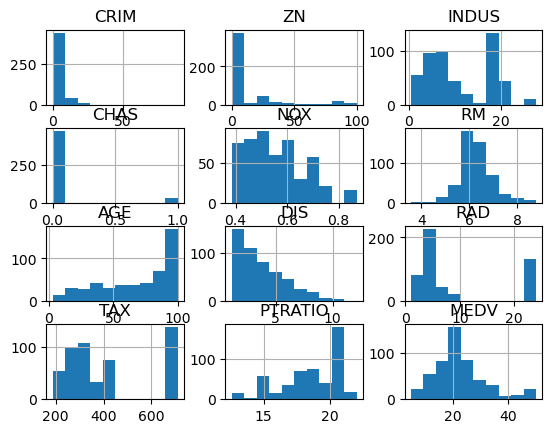

In [8]:
boston.hist(sharex=False, sharey=False) # not show x or y axes 

In [9]:
boston.corr() # correlation matrix 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.468536


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

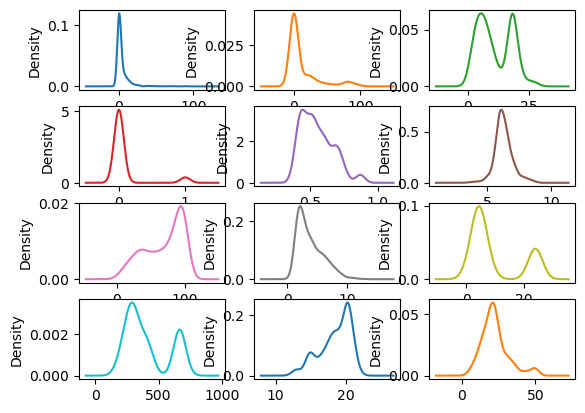

In [10]:
boston.plot(kind='density',subplots=True,layout=(4,3),sharex=False,sharey=False,legend=False)

CRIM          Axes(0.125,0.712609;0.227941x0.167391)
ZN         Axes(0.398529,0.712609;0.227941x0.167391)
INDUS      Axes(0.672059,0.712609;0.227941x0.167391)
CHAS          Axes(0.125,0.511739;0.227941x0.167391)
NOX        Axes(0.398529,0.511739;0.227941x0.167391)
RM         Axes(0.672059,0.511739;0.227941x0.167391)
AGE            Axes(0.125,0.31087;0.227941x0.167391)
DIS         Axes(0.398529,0.31087;0.227941x0.167391)
RAD         Axes(0.672059,0.31087;0.227941x0.167391)
TAX               Axes(0.125,0.11;0.227941x0.167391)
PTRATIO        Axes(0.398529,0.11;0.227941x0.167391)
MEDV           Axes(0.672059,0.11;0.227941x0.167391)
dtype: object

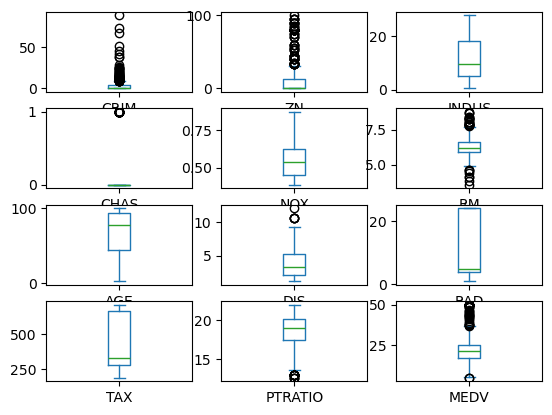

In [11]:
boston.plot(kind='box',subplots=True,layout=(4,3),sharex=False,sharey=False,legend=False)

array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>,
        <Axes: xlabel='CHAS', ylabel='CRIM'>,
        <Axes: xlabel='NOX', ylabel='CRIM'>,
        <Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='DIS', ylabel='CRIM'>,
        <Axes: xlabel='RAD', ylabel='CRIM'>,
        <Axes: xlabel='TAX', ylabel='CRIM'>,
        <Axes: xlabel='PTRATIO', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='NOX', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='AGE', ylabel='ZN'>,
        <Axes: xlabel='DIS', ylabel='ZN'>,
        <Axes: xlabel='RAD', ylabel='ZN'>,
        <Axes: xlabel='TAX', ylabel='ZN'>,
        <Axes: xlabe

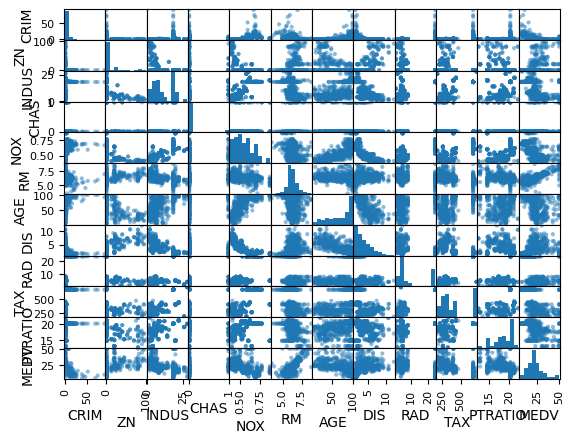

In [12]:
scatter_matrix(boston)

<Axes: >

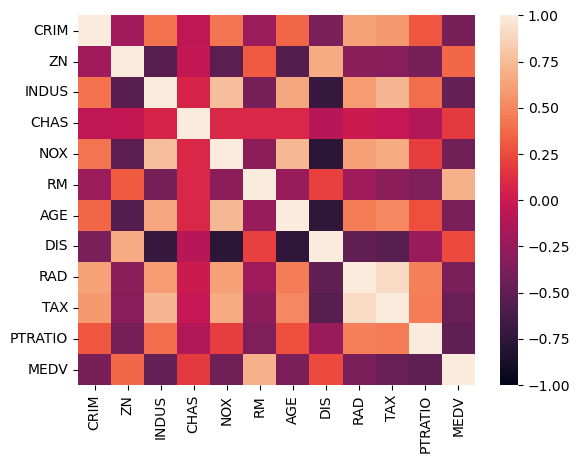

In [13]:
sns.heatmap(boston.corr(method='pearson'),vmin=-1,vmax=1)

In [14]:
# MachineLearning Part 
# Oldest version - extracting data from the dataframe 

array = boston.values # extract raw values from df - making it a numpy array

In [15]:
X = array[:,0:11] # collecting the predictors, explanatory variables - all rows but which columns? 
# slicing the array - including all columns EXCEPT column 11 
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.0000e+00 2.9600e+02 1.5300e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 2.0000e+00 2.4200e+02 1.7800e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 2.0000e+00 2.4200e+02 1.7800e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]]


In [16]:
Y = array[:,-1] # y-variables/response variables' data sliced 
print(Y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [17]:
# another way to access select rows/columns of the dataframe - BUT NOT ARRAY...IT IS STILL A PD DATAFRAME 
X = boston.iloc[:,:11]
Y = boston.iloc[:,-1]
print(X.head())
print('\n')
print(Y.head()) # single column...thus, a pandas SERIES 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0     15.3
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [18]:
# splitting the data into training and test sets 
test_size = 0.2
seed = 42 # randomization of the dataset...shuffling the data
# any number works! allows to reproduce the same run again! 

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=seed)
# we will run the x_test with algorithm then compare to actuals y_test to compute error rate

In [20]:
# K-fold CV approach 
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error' # max number of negative MSE - looking to max (minimizing errors)

In [21]:
# working on numerical variable (response)...thus it is a regressor KNN 
model = KNeighborsRegressor()

In [22]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed) # folding of the dataset 
# to have a look at the kfolds 
kfold.get_n_splits(X_train)
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [23]:
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
msg = 'KNN: %f (%f)' % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -57.216234 (23.988016)


In [24]:
scaler = StandardScaler().fit(X_train) 
rescaledX_train = scaler.transform(X_train)

In [25]:
k_values = np.arange(1,22) # different k values 
param_grid = dict(n_neighbors=k_values) 

In [26]:
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])}


In [27]:
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [28]:
grid_results = grid.fit(rescaledX_train, Y_train)

In [29]:
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

Best: -23.182775 using {'n_neighbors': np.int64(2)}


In [30]:
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_["std_test_score"]
params = grid_results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-37.513612 (13.286277) with: {'n_neighbors': np.int64(1)}
-23.182775 (8.851145) with: {'n_neighbors': np.int64(2)}
-24.367744 (10.275385) with: {'n_neighbors': np.int64(3)}
-26.126919 (11.408456) with: {'n_neighbors': np.int64(4)}
-28.587243 (12.941908) with: {'n_neighbors': np.int64(5)}
-29.510482 (13.130403) with: {'n_neighbors': np.int64(6)}
-30.282983 (12.235358) with: {'n_neighbors': np.int64(7)}
-30.435144 (12.127025) with: {'n_neighbors': np.int64(8)}
-30.538893 (11.775447) with: {'n_neighbors': np.int64(9)}
-30.940501 (11.966708) with: {'n_neighbors': np.int64(10)}
-31.408459 (12.776130) with: {'n_neighbors': np.int64(11)}
-31.220180 (12.662945) with: {'n_neighbors': np.int64(12)}
-31.122811 (13.180632) with: {'n_neighbors': np.int64(13)}
-31.391478 (13.469065) with: {'n_neighbors': np.int64(14)}
-31.225980 (13.916656) with: {'n_neighbors': np.int64(15)}
-31.673972 (14.405975) with: {'n_neighbors': np.int64(16)}
-31.930526 (14.976151) with: {'n_neighbors': np.int64(17)}
-31.978

Text(0, 0.5, 'Negative MSE')

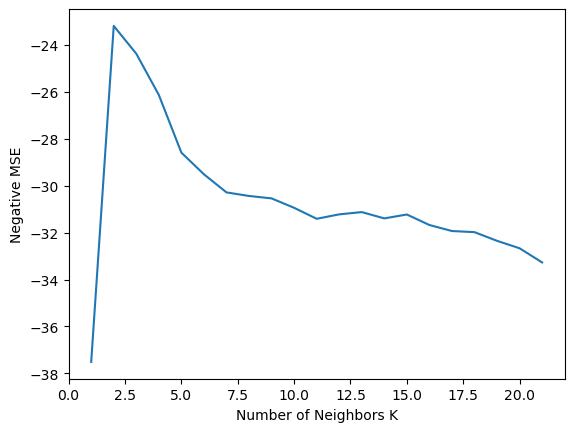

In [31]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative MSE")

In [32]:
scaler = StandardScaler().fit(X_train) 
rescaledX_train = scaler.transform(X_train) # scaling ONLY happing on TRAINING data 

In [33]:
model = KNeighborsRegressor(n_neighbors=2) # since we know which K works best 
model.fit(rescaledX_train, Y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
rescaledX_test = scaler.transform(X_test) # SAME SCALING used on TEST data 

In [35]:
estimates = model.predict(rescaledX_test)
print(estimates)

[27.25 33.15 17.65 22.9  16.   23.45 18.   17.95 16.2  19.35 22.35 21.05
 11.75 24.7  20.7  24.1  18.9  10.5  43.15 13.2  22.9  27.   15.55 21.3
 11.15 16.4  23.35 13.4  20.5  19.35 24.5  21.75 20.7  17.35 13.35 15.5
 27.65 19.8  21.55 22.9  19.65 30.9  43.15 20.8  21.7  10.4  14.05 22.9
 21.15 27.25 25.   29.2  16.55 23.05 41.9  21.8  13.95 32.6  24.4  18.15
 23.9  28.7  28.75 21.5  21.65 20.5  10.8  25.45 31.4  21.6  20.25 24.1
 10.55 18.4  24.7   9.7  19.35 43.15 10.55 11.65 23.15 24.35 23.3  12.65
 20.95 26.3  13.75 23.05 25.5  18.6  23.3   7.85 18.65 20.9  18.45 18.65
 12.05 12.85 12.6  20.8  21.6  24.7 ]


In [36]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [37]:
# Tunable KNN

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [39]:
test = pd.read_csv("EVtripsGTAtest.csv")
print(test.head())
print(test.shape)

         Date  Distance driven (km) Driving time (h)  Average speed (km/h)
0  2016-02-05                     9            00:18                    31
1  2016-02-06                    12            00:30                    24
2  2016-02-28                    35            01:10                    30
3  2016-03-05                    40            00:56                    43
4  2016-03-08                     9            00:22                    26
(51, 4)


In [40]:
def to_minutes(time_str):
    hours, minutes = map(int, time_str.split(":"))
    return hours * 60 + minutes

test["Driving time (h)"] = test["Driving time (h)"].astype(str).apply(to_minutes)

In [41]:
X = test.drop(columns=["Average speed (km/h)", "Date"])
y = test["Average speed (km/h)"]

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# --- Define model and parameter grid ---
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [44]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [45]:
# --- Evaluate on the held-out test split ---
best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("Best Parameters:", grid.best_params_)
print("Validation RMSE:", rmse)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Validation RMSE: 3.1976738114728023


In [46]:
final_predictions = best_model.predict(X)

In [47]:
np.savetxt("hendawisamirpredictions.txt", final_predictions, fmt="%.6f")
print("Predictions saved to hendawisamirpredictions.txt")

Predictions saved to hendawisamirpredictions.txt
